Saving ds_salaries.csv to ds_salaries.csv
First few rows of the dataset:
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_loc

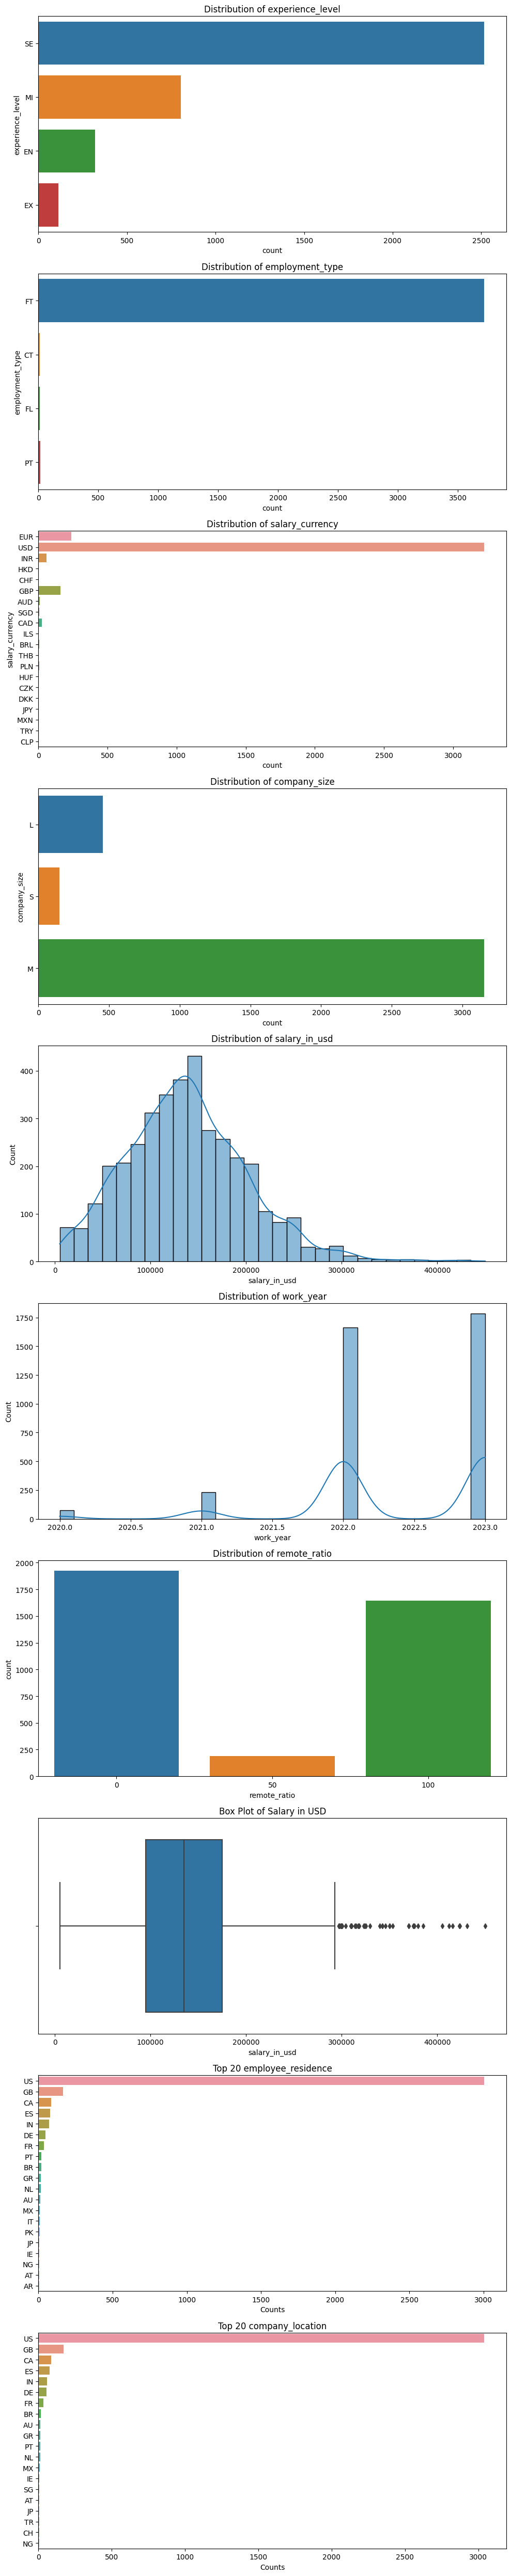

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

data = pd.read_csv('ds_salaries.csv')

print("First few rows of the dataset:")
print(data.head())

print("\nStatistical summary of numerical features:")
numerical_stats = data.describe()
print(numerical_stats)

def plot_top_n_categories(data, category, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    top_categories = data[category].value_counts().head(top_n)
    sns.barplot(y=top_categories.index, x=top_categories, ax=ax)
    ax.set_title(f'Top {top_n} {category}')
    ax.set_xlabel('Counts')
    ax.set_ylabel('')

categorical_features = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
numerical_features = ['salary_in_usd', 'work_year', 'remote_ratio']

num_categorical_plots = len(categorical_features)
num_numerical_plots = len(numerical_features) + 1
num_additional_plots = 2
total_plots = num_categorical_plots + num_numerical_plots + num_additional_plots


fig, axs = plt.subplots(total_plots, 1, figsize=(10, 5 * total_plots))


for i, feature in enumerate(categorical_features):
    sns.countplot(y=data[feature], ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')


for i, feature in enumerate(numerical_features):
    ax_index = i + num_categorical_plots
    if feature != 'remote_ratio':
        sns.histplot(data[feature], bins=30, kde=True, ax=axs[ax_index])
        axs[ax_index].set_title(f'Distribution of {feature}')
    else:
        sns.countplot(x=data[feature], ax=axs[ax_index])
        axs[ax_index].set_title(f'Distribution of {feature}')


sns.boxplot(x=data['salary_in_usd'], ax=axs[num_categorical_plots + num_numerical_plots - 1])
axs[num_categorical_plots + num_numerical_plots - 1].set_title('Box Plot of Salary in USD')


plot_top_n_categories(data, 'employee_residence', top_n=20, ax=axs[-2])
plot_top_n_categories(data, 'company_location', top_n=20, ax=axs[-1])


plt.tight_layout()
plt.show()

def plot_top_n_categories(data, category, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    top_categories = data[category].value_counts().head(top_n)
    sns.barplot(y=top_categories.index, x=top_categories, ax=ax)
    ax.set_title(f'Top {top_n} {category}')
    ax.set_xlabel('Counts')
    ax.set_ylabel('')


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


data = pd.read_csv('ds_salaries.csv')


features = ['experience_level', 'employment_type', 'company_size', 'remote_ratio']
target = 'salary_in_usd'


X = data[features]
y = data[target]


categorical_features = ['experience_level', 'employment_type', 'company_size']
numerical_features = ['remote_ratio']


categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


predictions = model.predict(X_test)


Epoch 1/100
76/76 [==============================] - 3s 11ms/step - loss: 22639843328.0000 - val_loss: 21888800768.0000
Epoch 2/100
76/76 [==============================] - 1s 7ms/step - loss: 22403942400.0000 - val_loss: 21211426816.0000
Epoch 3/100
76/76 [==============================] - 0s 4ms/step - loss: 20497680384.0000 - val_loss: 17607528448.0000
Epoch 4/100
76/76 [==============================] - 0s 4ms/step - loss: 14546493440.0000 - val_loss: 9801672704.0000
Epoch 5/100
76/76 [==============================] - 0s 6ms/step - loss: 6758072320.0000 - val_loss: 4160546816.0000
Epoch 6/100
76/76 [==============================] - 0s 4ms/step - loss: 3744812800.0000 - val_loss: 3533916672.0000
Epoch 7/100
76/76 [==============================] - 0s 4ms/step - loss: 3452049920.0000 - val_loss: 3445338880.0000
Epoch 8/100
76/76 [==============================] - 0s 4ms/step - loss: 3358831616.0000 - val_loss: 3393818368.0000
Epoch 9/100
76/76 [==============================] - 0s 

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


data = pd.read_csv('ds_salaries.csv')

features = ['experience_level', 'employment_type', 'company_size', 'remote_ratio']
target = 'salary_in_usd'

X = data[features]
y = data[target]

categorical_features = ['experience_level', 'employment_type', 'company_size']
numerical_features = ['remote_ratio']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)


X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


predictions = model.predict(X_test)


Epoch 1/100
76/76 [==============================] - 1s 4ms/step - loss: 22646300672.0000 - val_loss: 21920862208.0000
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 22645399552.0000 - val_loss: 21919645696.0000
Epoch 3/100
76/76 [==============================] - 0s 3ms/step - loss: 22643609600.0000 - val_loss: 21917259776.0000
Epoch 4/100
76/76 [==============================] - 0s 3ms/step - loss: 22640648192.0000 - val_loss: 21913821184.0000
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 22636623872.0000 - val_loss: 21909344256.0000
Epoch 6/100
76/76 [==============================] - 0s 3ms/step - loss: 22631497728.0000 - val_loss: 21903810560.0000
Epoch 7/100
76/76 [==============================] - 0s 3ms/step - loss: 22625406976.0000 - val_loss: 21897390080.0000
Epoch 8/100
76/76 [==============================] - 0s 3ms/step - loss: 22618339328.0000 - val_loss: 21889921024.0000
Epoch 9/100
76/76 [=============================

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


data = pd.read_csv('ds_salaries.csv')


data['salary_in_usd'] = np.log1p(data['salary_in_usd'])


features = ['experience_level', 'employment_type', 'company_size', 'remote_ratio']
target = 'salary_in_usd'

X = data[features]
y = data[target]


categorical_features = ['experience_level', 'employment_type', 'company_size']
numerical_features = ['remote_ratio']


categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)

test_loss = model.evaluate(X_test, y_test)
print(f"Improved Test Loss: {test_loss}")


predictions = model.predict(X_test)


Epoch 1/150
38/38 [==============================] - 1s 6ms/step - loss: 49.1898 - val_loss: 1.8816
Epoch 2/150
38/38 [==============================] - 0s 3ms/step - loss: 5.0317 - val_loss: 1.0894
Epoch 3/150
38/38 [==============================] - 0s 3ms/step - loss: 3.8256 - val_loss: 0.7343
Epoch 4/150
38/38 [==============================] - 0s 3ms/step - loss: 3.7570 - val_loss: 0.7626
Epoch 5/150
38/38 [==============================] - 0s 3ms/step - loss: 3.3761 - val_loss: 0.5823
Epoch 6/150
38/38 [==============================] - 0s 3ms/step - loss: 3.1818 - val_loss: 0.5380
Epoch 7/150
38/38 [==============================] - 0s 3ms/step - loss: 2.8579 - val_loss: 0.6382
Epoch 8/150
38/38 [==============================] - 0s 3ms/step - loss: 3.0047 - val_loss: 0.7504
Epoch 9/150
38/38 [==============================] - 0s 3ms/step - loss: 2.8189 - val_loss: 1.1239
Epoch 10/150
38/38 [==============================] - 0s 3ms/step - loss: 2.7785 - val_loss: 1.1791
Epoch 11